Question: 4

Importing all libraries here

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error


creating a random dataset

performing cross validation

finding risk

best lambda at that risk


In [2]:
np.random.seed(35)


n = 1000
p = 10000
beta = np.ones(p)
lambdaV = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100]

# dataset generation
X = np.random.choice([-1, 1], size=(n, p))
epsilon = np.random.randn(n)
y = X @ beta + epsilon

# cross validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
avg_risk = []

for lam in lambdaV:
    ridge = Ridge(alpha=lam, fit_intercept=False)
    risks = []

    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        ridge.fit(X_train, y_train)
        y_pred = ridge.predict(X_val)

        # Computing risk = E[(f(x) - y)^2]
        risk = mean_squared_error(y_val, y_pred) + 1
        risks.append(risk)

    avg_risk.append(np.mean(risks))


optimal_lambda = lambdaV[np.argmin(avg_risk)]
optimal_risk = min(avg_risk)

print(f"Optimal lambda: {optimal_lambda}")
print(f"at optimal lambda risk: {optimal_risk:.4f}")


Optimal lambda: 100
at optimal lambda risk: 9152.7451


Visualisation of risk vs lambda

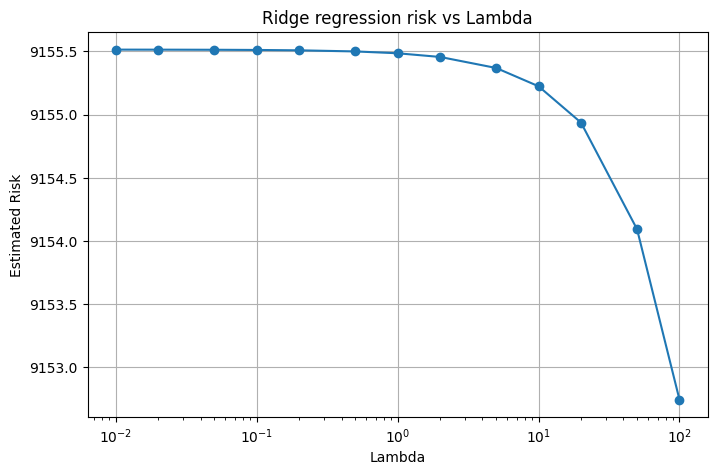

In [3]:
# Plotting risk vs lambda value
plt.figure(figsize=(8, 5))
plt.plot(lambdaV, avg_risk, marker='o', linestyle='-')
plt.xscale("log")
plt.xlabel("Lambda")
plt.ylabel("Estimated Risk")
plt.title("Ridge regression risk vs Lambda")
plt.grid(True)
plt.show()